In [1]:
#installing pyforest package
!pip install --upgrade pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=c63c3f87f78df84a1578c15dbc5ae69e278f79b7ed624218cacc678184c5184c
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [2]:
#import all the neccesary libraries at once
from pyforest import *
lazy_imports()

['from sklearn.decomposition import PCA',
 'from sklearn.preprocessing import LabelEncoder',
 'import matplotlib.pyplot as plt',
 'import torch',
 'from sklearn.model_selection import KFold',
 'import numpy as np',
 'import awswrangler as wr',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.manifold import TSNE',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import plotly as py',
 'from sklearn.cluster import KMeans',
 'import altair as alt',
 'from openpyxl import load_workbook',
 'import gensim',
 'import matplotlib as mpl',
 'from sklearn.ensemble import RandomForestClassifier',
 'from PIL import Image',
 'from xlrd import open_workbook',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.linear_model import LinearRegression',
 'import skimage',
 'from sklearn.preprocessing import MinMaxScaler',
 'import statistics',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.preprocessing import RobustScaler',
 'from

In [3]:
#Loading the data set
df1 = pd.read_csv("/content/mental-and-substance-use-as-share-of-disease (1).csv")
df2 = pd.read_csv("/content/prevalence-by-mental-and-substance-use-disorder.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
#merging both the dataset in one variable
df = pd.merge(df1,df2)

<IPython.core.display.Javascript object>

In [5]:
df.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [6]:
df.shape  #checking the shape of the dataset (rows,columns)

(6840, 11)

In [7]:
df.dtypes #checking the data types

Entity                                                                                              object
Code                                                                                                object
Year                                                                                                 int64
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)    float64
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                           float64
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                        float64
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                        float64
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                       float64
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                      float64
Prevalence - Depressive disorders - S

In [8]:
df.isnull().sum() #checking the null values

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Pe

In [9]:
df.drop("Code",axis =1,inplace = True) #dropping the code column as code has no use in our data set

In [10]:
df.isnull().sum()

Entity                                                                                             0
Year                                                                                               0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)    0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                           0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                       0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                    0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)           

In [11]:
#changing column name
df.set_axis(["country","Year","Mental disorders","Schizophrenia","Bipolar disorder","Eating disorders","Anxiety disorders","Drug use disorders","Depressive disorders",
             "Alcohol use disorders"],axis = 'columns',inplace = True)

<ipython-input-11-30b49a636a27>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(["country","Year","Mental disorders","Schizophrenia","Bipolar disorder","Eating disorders","Anxiety disorders","Drug use disorders","Depressive disorders",


In [12]:
df.head()

,country,Year,Mental disorders,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorders,Drug use disorders,Depressive disorders,Alcohol use disorders
0,Afghanistan,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [47]:
#storing all the column in list format in col variable
col = list(df[["country","Mental disorders","Year","Schizophrenia","Bipolar disorder","Eating disorders","Anxiety disorders","Drug use disorders","Depressive disorders","Alcohol use disorders"]])

<IPython.core.display.Javascript object>

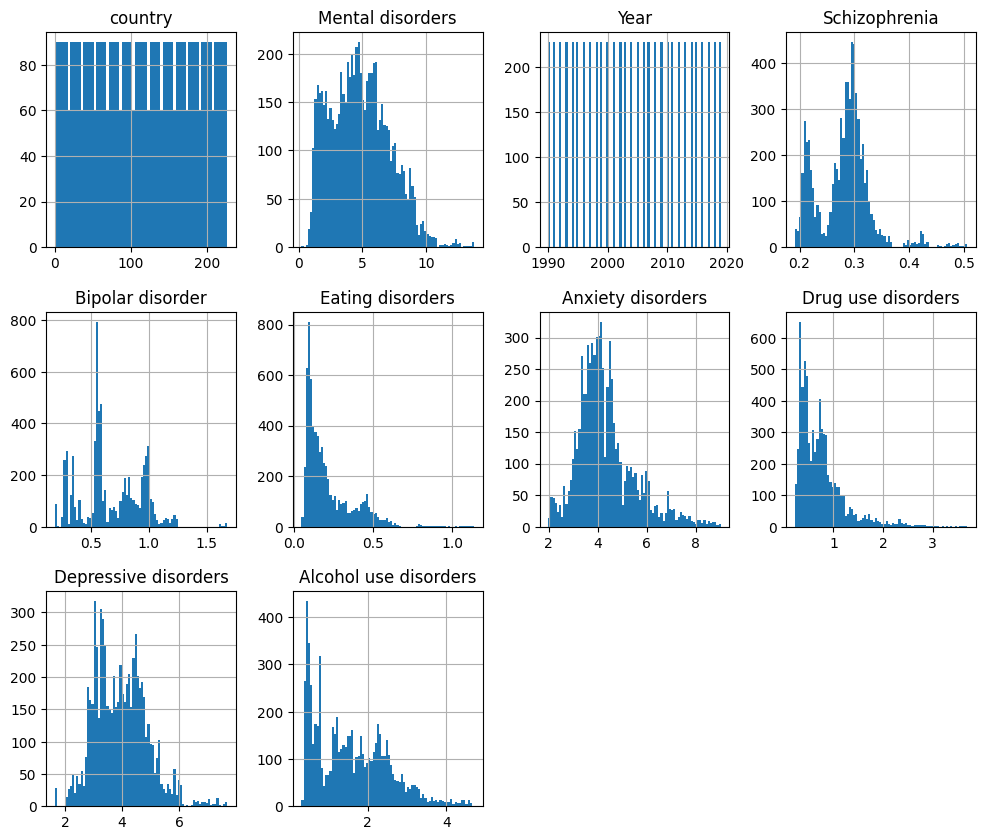

In [48]:
#displaying all the column as histogram
df[col].hist(bins = 80,figsize = (12,50),layout = (14,4))
plt.show()

In [20]:
# finding correlation between each attribute as it define the degree of relation between two variable
df.corr()

<ipython-input-20-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Mental disorders,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorders,Drug use disorders,Depressive disorders,Alcohol use disorders
Year,1.000000,0.198242,0.046543,0.013536,0.079822,0.043084,0.053236,-0.035427,-0.006759
Mental disorders,0.198242,1.000000,0.627326,0.616586,0.725597,0.640698,0.465970,-0.043484,0.190990
Schizophrenia,0.046543,0.627326,1.000000,0.200035,0.567001,0.395485,0.647464,-0.362826,0.327868
Bipolar disorder,0.013536,0.616586,0.200035,1.000000,0.712130,0.620014,0.421331,0.206731,0.361718
Eating disorders,0.079822,0.725597,0.567001,0.712130,1.000000,0.645671,0.679770,0.053520,0.379949
Anxiety disorders,0.043084,0.640698,0.395485,0.620014,0.645671,1.000000,0.452157,0.162404,0.170741
Drug use disorders,0.053236,0.465970,0.647464,0.421331,0.679770,0.452157,1.000000,-0.060790,0.485653
Depressive disorders,-0.035427,-0.043484,-0.362826,0.206731,0.053520,0.162404,-0.060790,1.000000,-0.007679
Alcohol use disorders,-0.006759,0.190990,0.327868,0.361718,0.379949,0.170741,0.485653,-0.007679,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-23-58b4b5027d0e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot =True,square = True,vmax = 1,cmap = 'viridis')


<IPython.core.display.Javascript object>

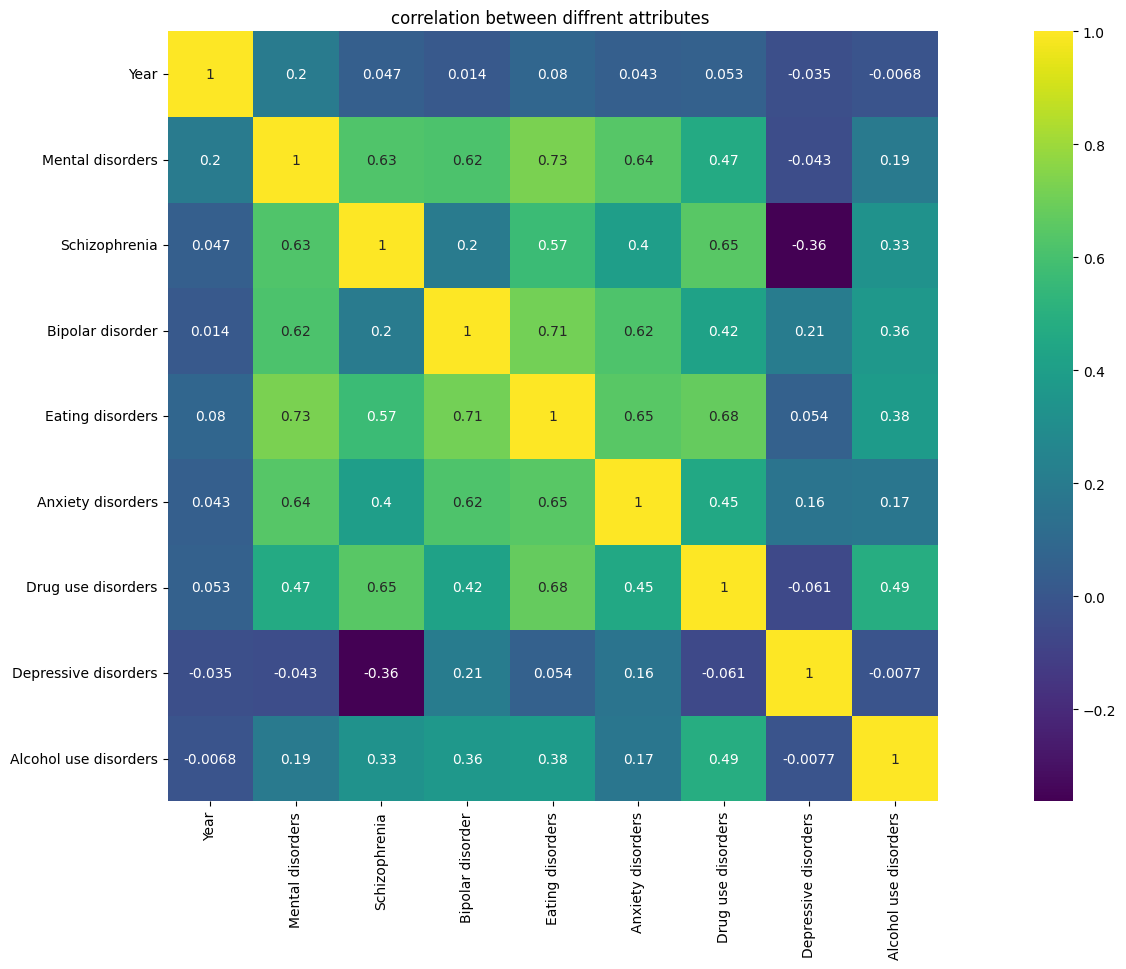

In [23]:
#plotting a heat map for the same correlation to visualize it better
plt.figure(figsize = (25,10))
plt.title("correlation between diffrent attributes ")
sns.heatmap(df.corr(),annot =True,square = True,vmax = 1,cmap = 'viridis')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

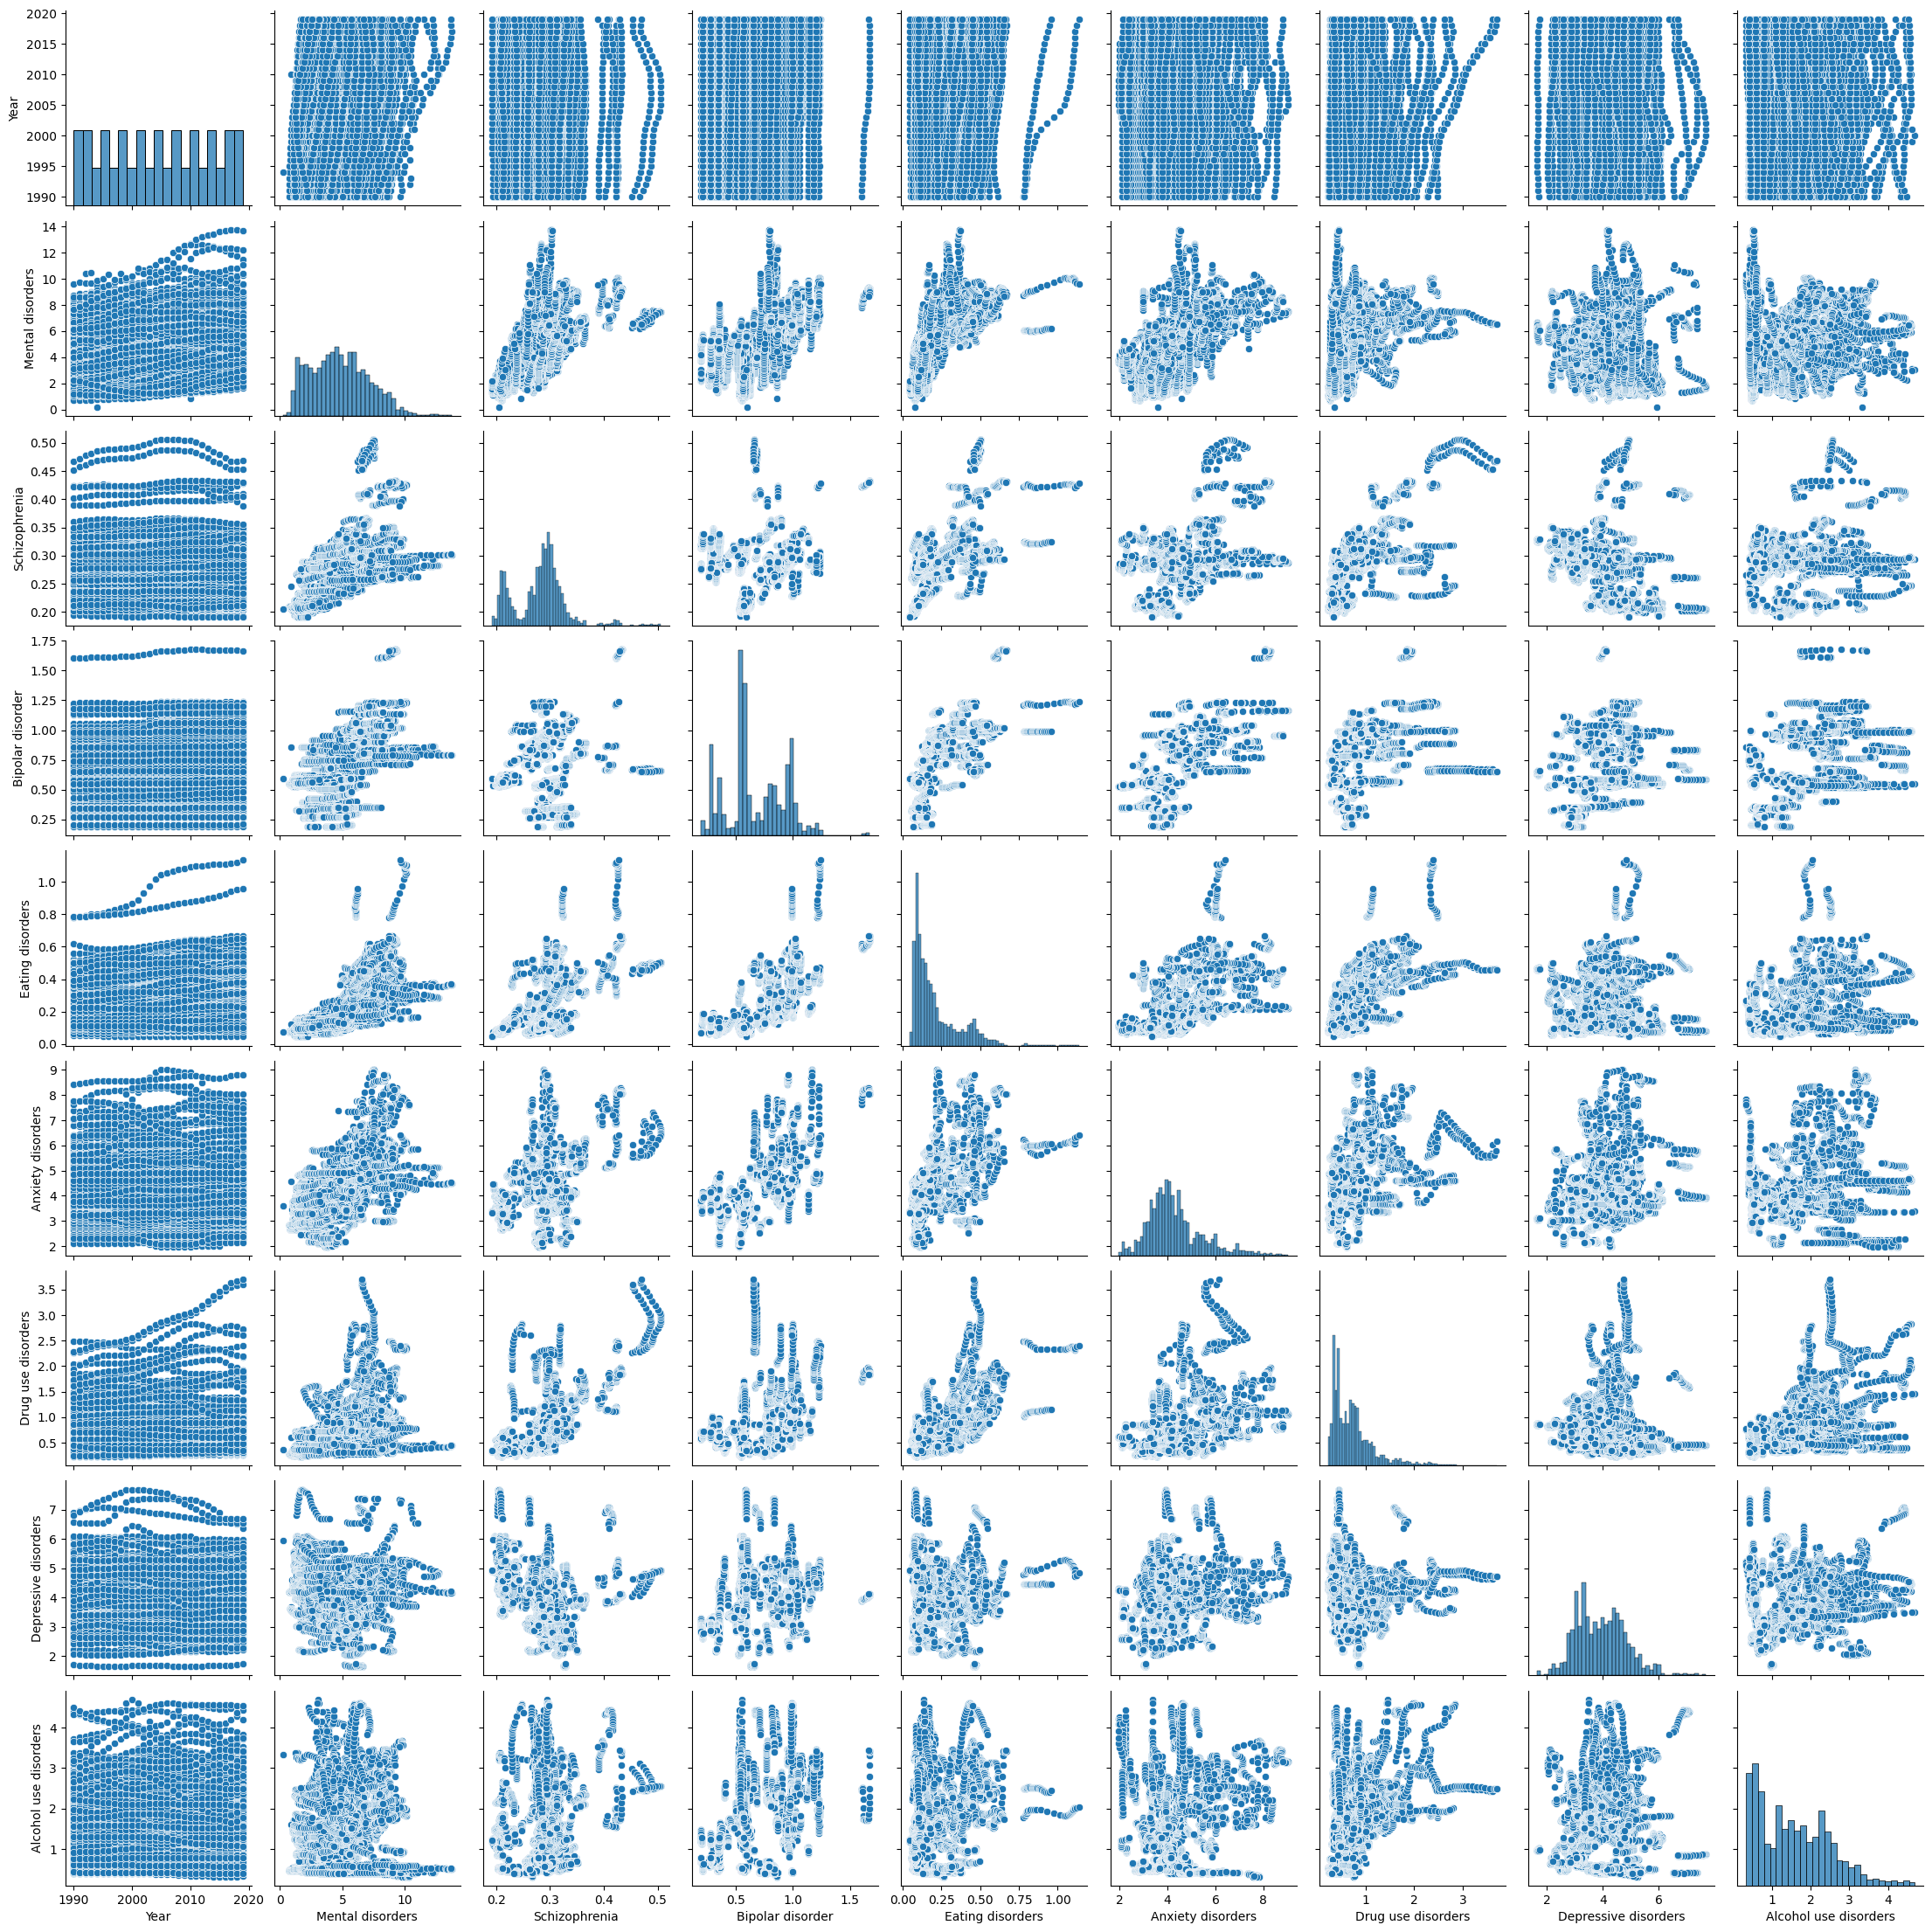

In [25]:
#plotting a pairplot
sns.pairplot(df)
plt.show()

In [26]:
#changing object to integer value
l = LabelEncoder()
for i in df.columns:
  if df[i].dtypes == "object":
    df[i]= l.fit_transform(df[i])

<IPython.core.display.Javascript object>

In [27]:
df.dtypes

country                    int64
Year                       int64
Mental disorders         float64
Schizophrenia            float64
Bipolar disorder         float64
Eating disorders         float64
Anxiety disorders        float64
Drug use disorders       float64
Depressive disorders     float64
Alcohol use disorders    float64
dtype: object

In [28]:
#choosing Dependent and independent Variable

y = df["Mental disorders"] # dependent variable
x = df.drop("Mental disorders",axis = 1) # independent variable

In [29]:
#splitting the data into training and testing data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

<IPython.core.display.Javascript object>

In [30]:
#training data
x_train

,country,Year,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorders,Drug use disorders,Depressive disorders,Alcohol use disorders
5418,180,2008,0.191915,0.589551,0.045606,3.366067,0.337348,4.909171,1.201792
4879,162,2009,0.299341,0.551432,0.154566,3.369208,1.386746,3.286060,3.419001
605,20,1995,0.213561,0.550517,0.090107,3.182445,0.298467,4.390414,0.539408
5866,195,2006,0.273002,0.539803,0.078368,2.476941,0.429241,2.944312,2.587206
5327,177,2007,0.312005,0.581282,0.167100,3.710683,0.790574,2.988647,2.218059
...,...,...,...,...,...,...,...,...,...
905,30,1995,0.203841,0.584931,0.077042,3.599235,0.338090,5.549156,1.579083
5192,173,1992,0.299469,0.571391,0.131668,3.493616,0.456680,3.260254,2.215395
3980,132,2010,0.285726,0.272603,0.090634,4.149825,0.724486,3.262589,0.773247
235,7,2015,0.300819,0.989655,0.277992,4.544870,0.832587,3.049130,2.169640


In [31]:
#selecting the model
model = LinearRegression()

<IPython.core.display.Javascript object>

In [32]:
#training the model
model.fit(x_train,y_train)

LinearRegression()

In [35]:
# coefficient(m)  { y = mx+c }

model.coef_

array([ 1.04083718e-03,  4.06809688e-02,  2.65612561e+01,  3.39312795e+00,
        3.64172625e+00,  2.75853364e-01, -1.09366669e+00,  8.93503187e-02,
       -3.25053489e-01])

In [36]:
#intercept (c)  { y = mx+c }
model.intercept_

-87.58359760775319

In [49]:
#predicting the model based on training data

model.predict(x_train)

array([2.16272621, 3.29294683, 2.23272694, ..., 3.55940077, 6.66669237,
       3.37079647])

In [34]:
#storing training data in y_train_predict variable

y_train_predict = model.predict(x_train)

In [37]:
#importing mean_squared_error and r2_score to check the error in the model and how well the model is performing

from sklearn.metrics import mean_squared_error,r2_score

In [39]:
mse = mean_squared_error(y_train,y_train_predict) # checking the diffrence between actual and predicted value
rmse = np.sqrt(mse)
r2 = r2_score(y_train,y_train_predict)*100 #checking model performace
print("Evaluation for training data")
print("*"*100)
print("mean squared error for training data is {}".format(mse))
print("root mean squared error for training data is {}".format(rmse))
print("model performance for training data is {}".format(r2))

<IPython.core.display.Javascript object>

Evaluation for training data
****************************************************************************************************
mean squared error for training data is 1.319758209121785
root mean squared error for training data is 1.148807298515197
model performance for training data is 74.97590276028221


In [44]:
y_test_predict = model.predict(x_test) #predicting the model based on testing data

In [50]:
mse = mean_squared_error(y_test,y_test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_test_predict)*100
print("Evaluation for testing data")
print("*"*100)
print("mean squared error for testing data is {}".format(mse))
print("root mean squared error for testing data is {}".format(rmse))
print("model performance for testing data is {}".format(r2))

<IPython.core.display.Javascript object>

Evaluation for testing data
****************************************************************************************************
mean squared error for testing data is 1.4170069807649
root mean squared error for testing data is 1.1903810233555052
model performance for testing data is 72.81627961777629


#We Achived a prediction accuracy of 72% on the testing data .
## By using linearRegression model our Machine learning model can predict the result 72% accuratley for  Mental health fitness tracker